<h2>Deep Learning Classification Model</h2>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sb
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.models import Sequential
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix

In [3]:
df = pd.read_csv('train_test_network.csv')
df.head()

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,OTH,...,0,0,-,-,-,-,-,-,1,backdoor
1,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000102,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
2,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000148,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
3,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000113,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
4,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000130,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor


<h3>EDA<h3>

In [4]:
print("The chosen network dataset size contains {} rows and {} columns.".format(df.shape[0], df.shape[1]))

The chosen network dataset size contains 211043 rows and 44 columns.


In [5]:
print('Checking Values for each columns in the dataset:')
df.isna().sum()

Checking Values for each columns in the dataset:


src_ip                    0
src_port                  0
dst_ip                    0
dst_port                  0
proto                     0
service                   0
duration                  0
src_bytes                 0
dst_bytes                 0
conn_state                0
missed_bytes              0
src_pkts                  0
src_ip_bytes              0
dst_pkts                  0
dst_ip_bytes              0
dns_query                 0
dns_qclass                0
dns_qtype                 0
dns_rcode                 0
dns_AA                    0
dns_RD                    0
dns_RA                    0
dns_rejected              0
ssl_version               0
ssl_cipher                0
ssl_resumed               0
ssl_established           0
ssl_subject               0
ssl_issuer                0
http_trans_depth          0
http_method               0
http_uri                  0
http_version              0
http_request_body_len     0
http_response_body_len    0
http_status_code    

- summary statistics for numerical columns

In [6]:
df.describe()

,src_port,dst_port,duration,src_bytes,dst_bytes,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,http_request_body_len,http_response_body_len,http_status_code,label
count,211043.000000,211043.000000,211043.000000,2.110430e+05,2.110430e+05,2.110430e+05,211043.000000,2.110430e+05,211043.000000,2.110430e+05,211043.000000,211043.000000,211043.000000,211043.000000,2.110430e+05,211043.000000,211043.000000
mean,38646.519543,3495.153770,7.700887,2.581136e+05,2.588046e+05,3.443234e+04,9.595220,7.760822e+02,3.846861,1.584687e+03,227.630805,3.610909,0.123989,0.065418,1.449295e+02,0.303905,0.763081
std,19307.271048,10191.624778,564.141946,1.709490e+07,1.802563e+07,5.261621e+06,91.778821,2.229703e+04,330.705796,1.901795e+05,2720.713562,23.797747,0.598804,9.243405,3.047244e+04,8.270377,0.425193
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,34608.000000,65.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,4.800000e+01,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000
50%,44754.000000,80.000000,0.000170,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,8.200000e+01,1.000000,4.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000
75%,51133.000000,1253.000000,0.054196,1.300000e+02,8.900000e+01,0.000000e+00,4.000000,4.150000e+02,2.000000,1.340000e+02,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000
max,65528.000000,65467.000000,93516.929170,3.890855e+09,3.913853e+09,1.854527e+09,24623.000000,6.522626e+06,121942.000000,8.639552e+07,32769.000000,255.000000,5.000000,2338.000000,1.342438e+07,404.000000,1.000000


- class distribution for the target variable

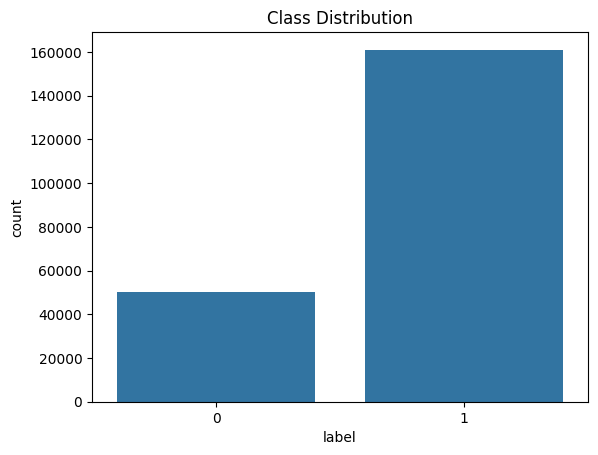

In [7]:
sb.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.show()

<h3>Data Preprocessing<h3>

- drop columns that are not needed

In [8]:
columns_to_drop = [
    'src_ip', 'src_port', 'dst_ip', 'dst_port',
    'dns_query', 
    'ssl_subject', 'ssl_issuer',
    'http_uri', 'http_user_agent', 'http_orig_mime_types', 'http_resp_mime_types',
    'weird_name', 'weird_addl', 'dns_AA', 'dns_RD', 'dns_RA', 'weird_notice'
]
new_df = df.drop(columns=columns_to_drop)
print("Total number of columns dropped: {} columns.".format(df.shape[1] - new_df.shape[1]))

Total number of columns dropped: 17 columns.


- Handling missing values to be replaced with the mode.

In [9]:
categorical_cols = new_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col in new_df.columns:
        unique_vals = new_df[col].unique()
        print(f"{col}: {', '.join(map(str, unique_vals))}\n")
    else:
        print(f"Column '{col}' not found in dataset.\n")

proto: tcp, udp, icmp

service: -, smb;gssapi, dce_rpc, smb, dns, ssl, http, ftp, gssapi

conn_state: OTH, REJ, S1, RSTR, SF, RSTO, SH, S3, S0, SHR, S2, RSTOS0, RSTRH

dns_rejected: -, F, T

ssl_version: -, TLSv10, TLSv12, TLSv13

ssl_cipher: -, TLS_ECDHE_RSA_WITH_AES_256_CBC_SHA, TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256, TLS_AES_128_GCM_SHA256, TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256, TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384

ssl_resumed: -, F, T

ssl_established: -, T, F

http_trans_depth: -, 1, 2, 10, 3, 4, 5, 6, 7, 8, 9

http_method: -, GET, POST, HEAD

http_version: -, 1.1

type: backdoor, ddos, dos, injection, mitm, normal, password, ransomware, scanning, xss



- Handling missing value: '-'

In [10]:
for col in ['proto', 'conn_state', 'http_method', 'http_version', 'ssl_version', 'ssl_cipher']:
    new_df[col] = new_df[col].replace("-", "unknown")
new_df['service'] = new_df['service'].replace("-", "unknown")

In [11]:
columns_with_missing_data = ['dns_rejected', 'http_trans_depth', 'ssl_resumed', 'ssl_established']
new_df[columns_with_missing_data] = new_df[columns_with_missing_data].replace('-', pd.NA)

for col in columns_with_missing_data:
    missing_mask = new_df[col].isna()  #rows with missing values
    if missing_mask.sum() > 0:  #only perform if there are missing values
        #sample randomly from existing values and fill the missing entries
        sampled_values = new_df[col].dropna().sample(missing_mask.sum(), replace=True).values
        new_df.loc[missing_mask, col] = sampled_values
print("\nMissing data after imputation:")
print(new_df[columns_with_missing_data].isna().sum())


Missing data after imputation:
dns_rejected        0
http_trans_depth    0
ssl_resumed         0
ssl_established     0
dtype: int64


In [12]:
categorical_cols = new_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col in new_df.columns:
        unique_vals = new_df[col].unique()
        print(f"{col}: {', '.join(map(str, unique_vals))}\n")
    else:
        print(f"Column '{col}' not found in dataset.\n")

proto: tcp, udp, icmp

service: unknown, smb;gssapi, dce_rpc, smb, dns, ssl, http, ftp, gssapi

conn_state: OTH, REJ, S1, RSTR, SF, RSTO, SH, S3, S0, SHR, S2, RSTOS0, RSTRH

dns_rejected: T, F

ssl_version: unknown, TLSv10, TLSv12, TLSv13

ssl_cipher: unknown, TLS_ECDHE_RSA_WITH_AES_256_CBC_SHA, TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256, TLS_AES_128_GCM_SHA256, TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256, TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384

ssl_resumed: T, F

ssl_established: F, T

http_trans_depth: 1, 8, 2, 3, 5, 6, 10, 9, 4, 7

http_method: unknown, GET, POST, HEAD

http_version: unknown, 1.1

type: backdoor, ddos, dos, injection, mitm, normal, password, ransomware, scanning, xss



In [13]:
X = new_df.drop('label', axis=1)
y = new_df['label']

ros = RandomOverSampler(random_state=42)
x_bal, y_bal = ros.fit_resample(X, y)

print("Resampled class distribution:\n", pd.Series(y_bal).value_counts())
print("Resampled data distribution: {}".format(x_bal.shape) )

Resampled class distribution:
 label
1    161043
0    161043
Name: count, dtype: int64
Resampled data distribution: (322086, 26)


In [14]:
x_bal.head()

,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,...,ssl_cipher,ssl_resumed,ssl_established,http_trans_depth,http_method,http_version,http_request_body_len,http_response_body_len,http_status_code,type
0,tcp,unknown,290.371539,101568,2592,OTH,0,108,108064,31,...,unknown,T,F,1,unknown,unknown,0,0,0,backdoor
1,tcp,unknown,0.000102,0,0,REJ,0,1,52,1,...,unknown,F,F,1,unknown,unknown,0,0,0,backdoor
2,tcp,unknown,0.000148,0,0,REJ,0,1,52,1,...,unknown,F,T,8,unknown,unknown,0,0,0,backdoor
3,tcp,unknown,0.000113,0,0,REJ,0,1,48,1,...,unknown,F,F,1,unknown,unknown,0,0,0,backdoor
4,tcp,unknown,0.000130,0,0,REJ,0,1,52,1,...,unknown,T,F,1,unknown,unknown,0,0,0,backdoor


- Handling target class imbalance

In [15]:
encoding_mappings = {}
categorical_columns = x_bal.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_columns:
    x_bal[col] = label_encoder.fit_transform(x_bal[col]) #apply label encoding to the columns
    encoding_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))) #store the encoding mapping

- save the mappings to a CSV file for later reference

In [16]:
for column, mapping in encoding_mappings.items():
    print("Encoding mapping for {}: {}".format(column, mapping))

Encoding mapping for proto: {'icmp': np.int64(0), 'tcp': np.int64(1), 'udp': np.int64(2)}
Encoding mapping for service: {'dce_rpc': np.int64(0), 'dns': np.int64(1), 'ftp': np.int64(2), 'gssapi': np.int64(3), 'http': np.int64(4), 'smb': np.int64(5), 'smb;gssapi': np.int64(6), 'ssl': np.int64(7), 'unknown': np.int64(8)}
Encoding mapping for conn_state: {'OTH': np.int64(0), 'REJ': np.int64(1), 'RSTO': np.int64(2), 'RSTOS0': np.int64(3), 'RSTR': np.int64(4), 'RSTRH': np.int64(5), 'S0': np.int64(6), 'S1': np.int64(7), 'S2': np.int64(8), 'S3': np.int64(9), 'SF': np.int64(10), 'SH': np.int64(11), 'SHR': np.int64(12)}
Encoding mapping for dns_rejected: {'F': np.int64(0), 'T': np.int64(1)}
Encoding mapping for ssl_version: {'TLSv10': np.int64(0), 'TLSv12': np.int64(1), 'TLSv13': np.int64(2), 'unknown': np.int64(3)}
Encoding mapping for ssl_cipher: {'TLS_AES_128_GCM_SHA256': np.int64(0), 'TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256': np.int64(1), 'TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256': np.int64(2),

In [17]:
x_bal.head()

,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,...,ssl_cipher,ssl_resumed,ssl_established,http_trans_depth,http_method,http_version,http_request_body_len,http_response_body_len,http_status_code,type
0,1,8,290.371539,101568,2592,0,0,108,108064,31,...,5,1,0,0,3,1,0,0,0,0
1,1,8,0.000102,0,0,1,0,1,52,1,...,5,0,0,0,3,1,0,0,0,0
2,1,8,0.000148,0,0,1,0,1,52,1,...,5,0,1,8,3,1,0,0,0,0
3,1,8,0.000113,0,0,1,0,1,48,1,...,5,0,0,0,3,1,0,0,0,0
4,1,8,0.000130,0,0,1,0,1,52,1,...,5,1,0,0,3,1,0,0,0,0


- lastly sclaing the preprocessed data before training

In [18]:
scaler = StandardScaler()
x_bal = scaler.fit_transform(x_bal)
x_bal

array([[-0.72481576,  0.86964008,  0.61110989, ..., -0.00722524,
        -0.05038041, -2.09118416],
       [-0.72481576,  0.86964008, -0.01308605, ..., -0.00722524,
        -0.05038041, -2.09118416],
       [-0.72481576,  0.86964008, -0.01308595, ..., -0.00722524,
        -0.05038041, -2.09118416],
       ...,
       [-0.72481576,  0.86964008, -0.01263952, ..., -0.00722524,
        -0.05038041,  0.11081292],
       [ 1.35926977, -1.31775123, -0.01308621, ..., -0.00722524,
        -0.05038041,  0.11081292],
       [ 1.35926977, -1.31775123, -0.01308619, ..., -0.00722524,
        -0.05038041,  0.11081292]])

<h3> Model Training<h3>

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size=0.2)

In [20]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_test, y_test))

Epoch 1/10
2014/2014 ━━━━━━━━━━━━━━━━━━━━ 109s 47ms/step - accuracy: 0.9544 - loss: 0.1199 - val_accuracy: 0.9997 - val_loss: 0.0018
Epoch 2/10
2014/2014 ━━━━━━━━━━━━━━━━━━━━ 137s 44ms/step - accuracy: 0.9996 - loss: 0.0029 - val_accuracy: 0.9997 - val_loss: 0.0011
Epoch 3/10
2014/2014 ━━━━━━━━━━━━━━━━━━━━ 136s 41ms/step - accuracy: 0.9997 - loss: 0.0016 - val_accuracy: 0.9999 - val_loss: 5.6171e-04
Epoch 4/10
2014/2014 ━━━━━━━━━━━━━━━━━━━━ 146s 43ms/step - accuracy: 0.9999 - loss: 0.0011 - val_accuracy: 0.9999 - val_loss: 6.8058e-04
Epoch 5/10
2014/2014 ━━━━━━━━━━━━━━━━━━━━ 141s 42ms/step - accuracy: 0.9998 - loss: 8.9144e-04 - val_accuracy: 0.9998 - val_loss: 8.5662e-04
Epoch 6/10
2014/2014 ━━━━━━━━━━━━━━━━━━━━ 142s 42ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 0.9999 - val_loss: 6.5793e-04
Epoch 7/10
2014/2014 ━━━━━━━━━━━━━━━━━━━━ 143s 42ms/step - accuracy: 0.9998 - loss: 6.9679e-04 - val_accuracy: 0.9999 - val_loss: 6.4859e-04
Epoch 8/10
2014/2014 ━━━━━━━━━━━━━━━━━━━━

<h3>Model Evaluation<h3>

- Accuracy over epochs

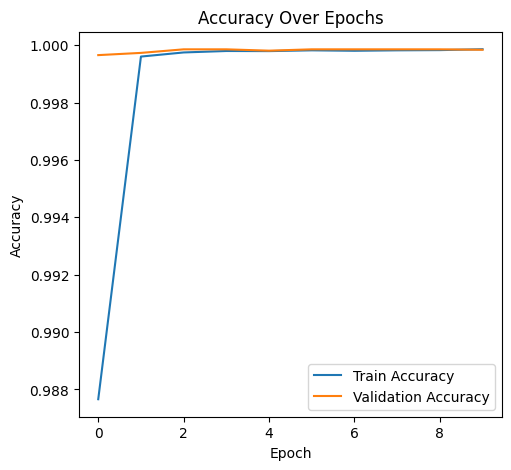

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

- Loss over epochs

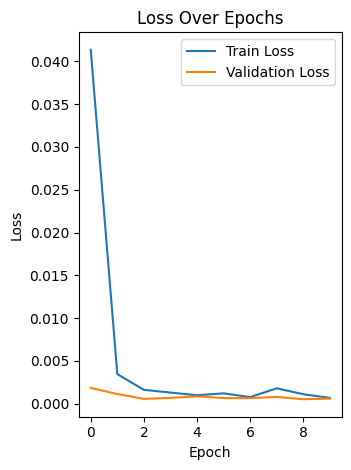

In [23]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

- Accuracy, precision, recall, and f1 score

In [24]:
loss, accuracy = model.evaluate(x_test, y_test)
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: {:.4f}'.format(acc))
print('Precision: {:.4f}'.format(prec))
print('Recall: {:.4f}'.format(rec))
print('F1 Score: {:.4f}'.format(f1))

2014/2014 ━━━━━━━━━━━━━━━━━━━━ 61s 29ms/step - accuracy: 0.9999 - loss: 3.4433e-04
2014/2014 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step
Accuracy: 0.9998
Precision: 1.0000
Recall: 0.9997
F1 Score: 0.9998


- Confusion matrix

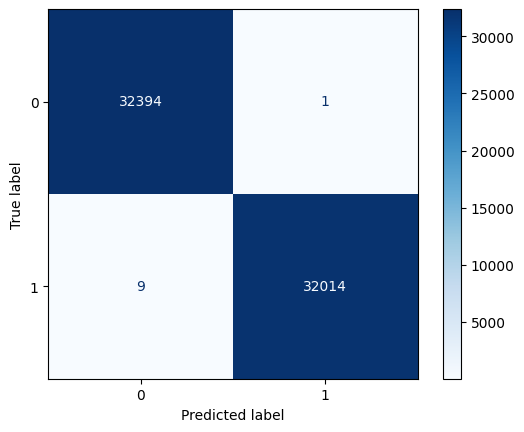

In [35]:
conf = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf).plot(cmap='Blues')

In [29]:
model.save('network_classification_model.h5')